## Principal Component Analysis
### By Chase Whitman

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# View all columns
pd.set_option('display.max_columns', None)

In [7]:
# Read in file
df = pd.read_csv('../Datasets/churn_clean.csv')

In [4]:
# Drop unique identifiers and location features
unique_columns = ['CaseOrder', 'Customer_id', 'Interaction', 'UID']
location_columns = ['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Job']

df.drop(columns=(unique_columns+location_columns), inplace=True)

In [5]:
# Identify continous variables
num_col = []
for d in df.columns.to_list():
    if df[d].dtype in ['float64', 'int64']:
        num_col.append(d)
print(f'The following {len(num_col)} continuous variables will be used in the PCA analyis:\n')
print(num_col)

The following 19 continuous variables will be used in the PCA analyis:

['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


In [6]:
# Create dataframe of selected features
df_pca = df[num_col]
X = np.array(df_pca)

In [7]:
# Instantiate StandardScaler and transform data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Mean:', round(X_scaled.mean(),1), 
      '\nStandard Deviation:', X_scaled.std())

Mean: -0.0 
Standard Deviation: 1.0


In [9]:
# Create and fit PCA object
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)

In [10]:
# Principal Components Matrix
pc_df = pd.DataFrame(principalComponents, columns=[f'PC{n}' for n in range(1,20)])
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,1.942300,-1.337721,1.831487,0.023419,-1.513535,0.077192,0.826967,-1.341603,0.239973,-0.182490,-0.545540,0.021450,0.113401,-0.817254,0.250712,-0.162040,-0.044133,-0.029573,-0.025835
1,-0.206827,-1.621536,0.528740,0.082539,0.647406,-1.417062,0.920507,-1.003928,0.626889,0.310403,-0.750444,1.330751,0.567773,0.836660,-0.472160,0.220242,-0.436902,-0.674096,-0.041373
2,-0.670961,-0.896588,0.221692,1.157158,-0.159396,-0.551978,1.537659,-0.879916,-0.405032,-0.084702,0.487362,-0.302283,-0.229946,-0.275754,-0.281748,1.017596,-1.344946,0.394792,0.062219
3,0.021687,-0.748942,2.191951,-1.232347,1.226702,0.081902,0.095358,0.845276,-1.609114,-0.372495,-0.811578,-0.737206,-0.165590,0.191280,0.822914,0.430133,0.242012,-0.020968,0.130181
4,1.349478,-1.847621,0.714975,-1.481345,-1.024314,1.058464,0.315974,0.770443,0.256369,-1.352095,-0.398601,0.078488,1.307491,0.340482,-0.025342,0.108791,0.212210,-0.130564,-0.059042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.116495,1.857724,0.186923,0.783320,0.471256,-0.293628,-1.340171,0.599143,-0.941147,-0.118093,0.118272,0.546518,0.437296,-0.641896,0.576913,-0.103062,0.515905,0.639993,0.081474
9996,1.922927,1.533202,0.732358,-1.712005,2.099395,2.235628,0.779927,1.555568,1.052409,1.945654,1.978821,1.765310,1.005697,-1.972381,0.751327,0.474712,0.475441,-0.826345,-0.031299
9997,1.448274,0.616591,0.019197,0.756671,-0.704089,0.441937,-0.766197,-1.242558,0.110973,0.627643,-0.309744,-0.008651,1.091821,-0.087867,-0.366215,0.562517,0.273864,-0.094305,-0.089358
9998,1.985968,2.065472,-0.040337,-1.587705,1.868107,-0.293682,0.268608,-0.394533,0.568273,1.012596,0.003723,1.163881,-0.521564,0.233405,-1.535197,-1.155978,1.169808,-0.348834,-0.067806


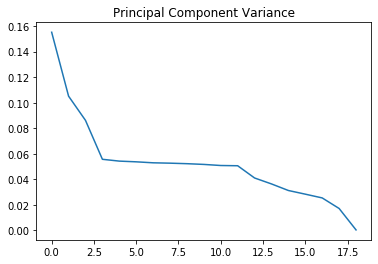

In [11]:
# PC Scree Plot
plt.plot(pca.explained_variance_ratio_)
plt.title('Principal Component Variance')
plt.show()

In [12]:
print('The three principal components accounted for the following variance:')
for n in range(1,4):
    print(f'PC {n}: {pca.explained_variance_ratio_[n-1]}')

total_var = round(pca.explained_variance_ratio_[:3].sum(),5)
print(f'\nThe total variance captured by the principal components is {total_var}')

The three principal components accounted for the following variance:
PC 1: 0.1551877535413072
PC 2: 0.10510063128467381
PC 3: 0.08613440016406952

The total variance captured by the principal components is 0.34642


In [13]:
principalComponents[:,:3]

array([[ 1.94229984, -1.33772109,  1.83148712],
       [-0.20682713, -1.62153642,  0.52873968],
       [-0.67096108, -0.89658833,  0.22169195],
       ...,
       [ 1.44827422,  0.61659072,  0.01919726],
       [ 1.98596834,  2.06547212, -0.04033659],
       [-2.27748875,  1.45380492, -0.80550255]])

In [14]:
# Create new dataframe with principal components
pca_df = pd.DataFrame(data=principalComponents[:,:3], 
                     columns = ['PC1', 'PC2', 'PC3'])
pca_df['Churn'] = df['Churn']

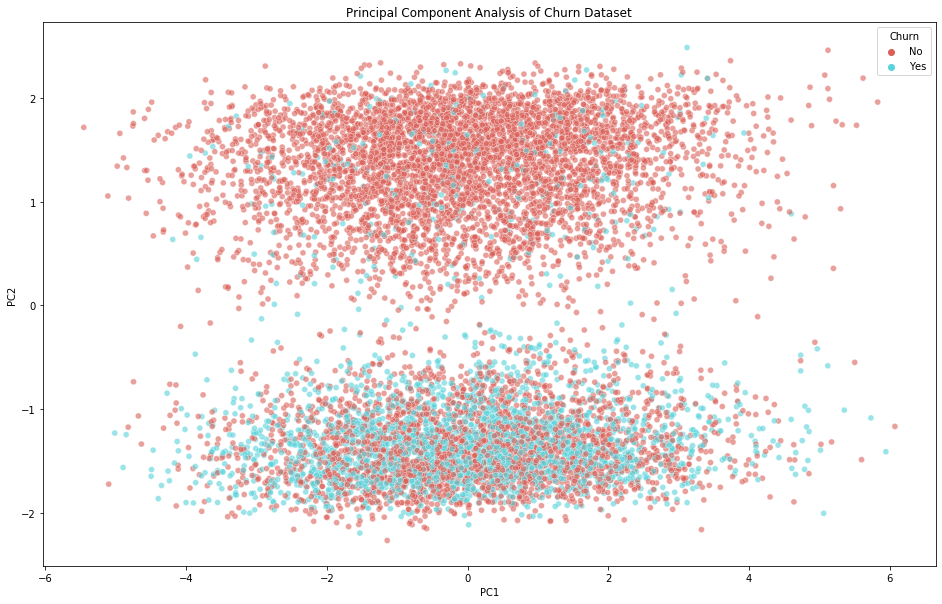

In [15]:
# Plot PC1 against PC2
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Churn',
    palette=sns.color_palette('hls', 2),
    data=pca_df,  
    legend='full',
    alpha=0.6).set(title='Principal Component Analysis of Churn Dataset')
plt.show()

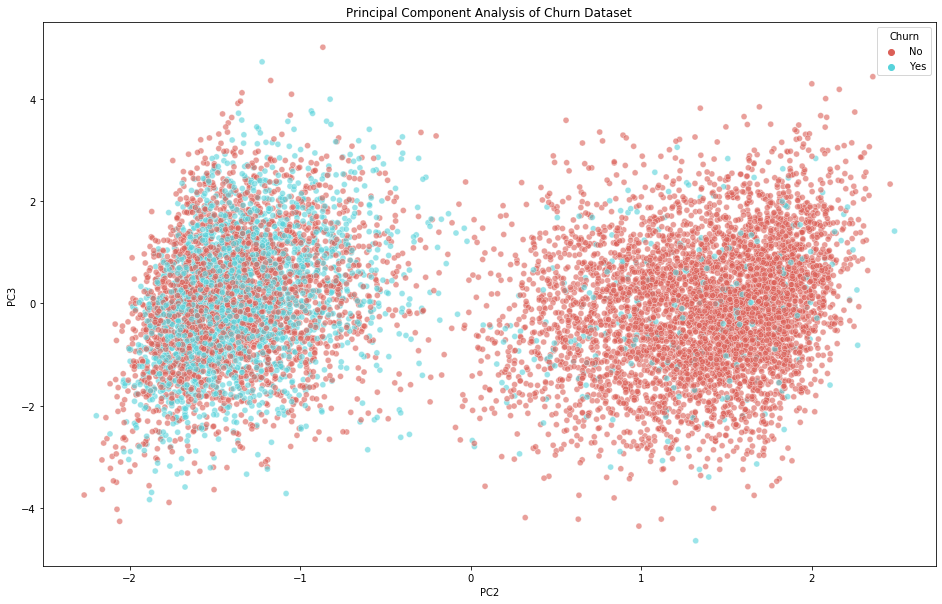

In [16]:
# Plot PC2 against PC3
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='PC2', y='PC3',
    hue='Churn',
    palette=sns.color_palette('hls', 2),
    data=pca_df,
    legend='full',
    alpha=0.6).set(title='Principal Component Analysis of Churn Dataset')
plt.show()

In [17]:
loadings = pd.DataFrame(pca.components_.T, 
                        columns = [f'PC{n+1}' for n in range(len(pca.components_))],
                       index=df_pca.columns)
loadings[['PC1', 'PC2', 'PC3']]

,PC1,PC2,PC3
Population,-0.002109,-0.005463,0.014732
Children,0.004072,0.015862,0.028393
Age,0.006459,0.000294,-0.029319
Income,0.001038,0.006035,0.025865
Outage_sec_perweek,-0.017516,0.003927,-0.014363
Email,0.008744,-0.020609,-0.003459
Contacts,-0.008761,0.003318,-0.011853
Yearly_equip_failure,-0.007688,0.017604,0.008199
Tenure,-0.016320,0.702323,-0.063085
MonthlyCharge,0.000930,0.039858,-0.009499
